In [1]:
import pandas as pd

cleaned_df = pd.read_csv(r'D:\Ashraf\NCI\Data Mining & Machine Learning\Project\Final Datasets\Network Intrusion\cleaned_network.csv')
cleaned_df

,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,srv_rerror_rate,dst_host_count,dst_host_srv_count,class
0,1,42,1,0.0,0.0,229.0,10.0,1.0,255,10,0
1,1,42,1,0.0,0.0,136.0,1.0,1.0,255,1,0
2,1,52,4,129.0,174.0,1.0,1.0,0.0,255,255,0
3,1,16,4,26.0,157.0,1.0,1.0,0.0,52,26,0
4,1,52,4,0.0,0.0,1.0,1.0,0.0,255,128,0
...,...,...,...,...,...,...,...,...,...,...,...
7197,2,38,4,115.0,0.0,22.0,22.0,0.0,253,22,1
7198,1,15,4,9.0,139.0,1.0,1.0,0.0,96,4,1
7199,1,20,4,274.0,1623.0,1.0,1.0,0.0,92,255,1
7200,1,42,1,0.0,0.0,235.0,10.0,1.0,255,10,0


# Random Forest

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

X = cleaned_df.drop(columns=['class'])
y = cleaned_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro')

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_rf)

Accuracy (Random Forest): 0.9729354614850798
Precision (Random Forest): 0.9719485428606267
Recall (Random Forest): 0.971012376327991
F1 Score (Random Forest): 0.9714755571120772


In [3]:
classif_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):")
print(classif_report_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       882
           1       0.97      0.96      0.97       559

    accuracy                           0.97      1441
   macro avg       0.97      0.97      0.97      1441
weighted avg       0.97      0.97      0.97      1441



In [4]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[864  18]
 [ 21 538]]


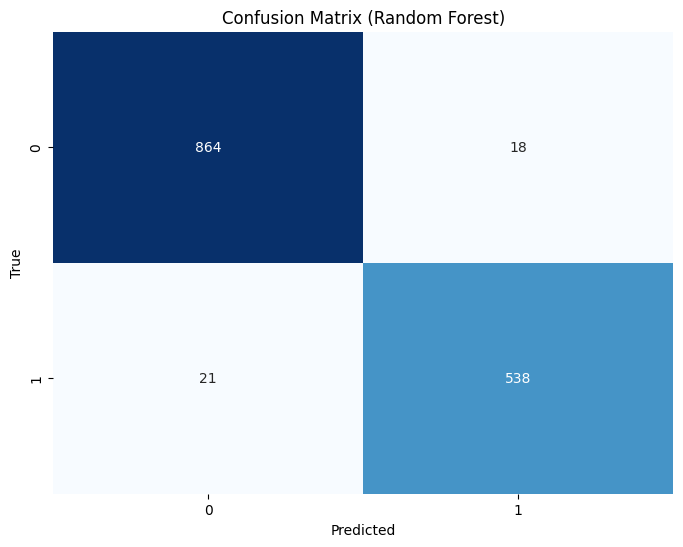

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

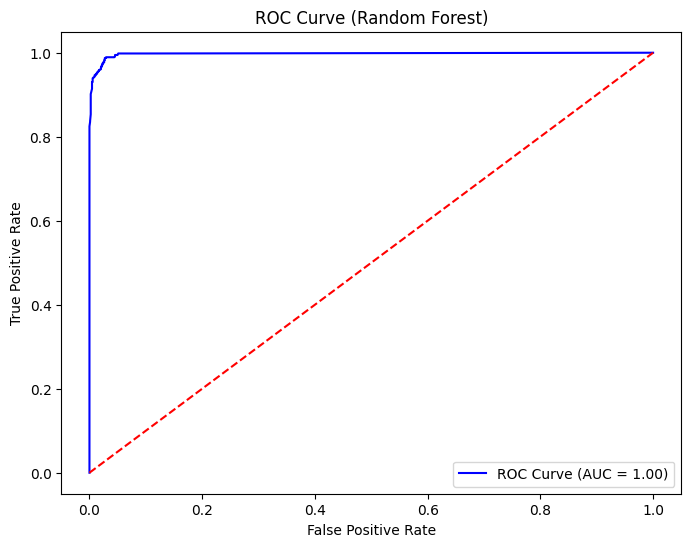

In [6]:
y_probs_rf = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs_rf)
auc = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

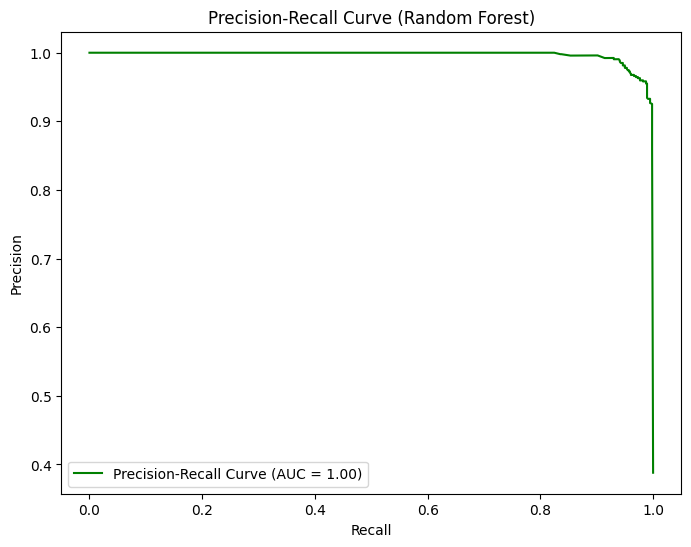

In [7]:
from sklearn.metrics import auc

precision_rf, recall_rf, thresholds = precision_recall_curve(y_test, y_probs_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='green', label=f'Precision-Recall Curve (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

In [8]:
import xgboost as xgb

params = {
    'objective': 'binary:logistic',
    'random_state': 42
}

model_xgb = xgb.XGBClassifier(**params)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Accuracy (XGBoost):", accuracy_xgb)
print("Precision (XGBoost):", precision_xgb)
print("Recall (XGBoost):", recall_xgb)
print("F1 Score (XGBoost):", f1_xgb)

Accuracy (XGBoost): 0.9750173490631506
Precision (XGBoost): 0.972875226039783
Recall (XGBoost): 0.962432915921288
F1 Score (XGBoost): 0.9676258992805755


In [9]:
import lightgbm as lgb

params = {
    'objective': 'binary',
    'random_state': 42
}

model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print("Accuracy (LightGBM):", accuracy_lgb)
print("Precision (LightGBM):", precision_lgb)
print("Recall (LightGBM):", recall_lgb)
print("F1 Score (LightGBM):", f1_lgb)

[LightGBM] [Info] Number of positive: 2162, number of negative: 3599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 5761, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375282 -> initscore=-0.509622
[LightGBM] [Info] Start training from score -0.509622
Accuracy (LightGBM): 0.9729354614850798
Precision (LightGBM): 0.9710144927536232
Recall (LightGBM): 0.9588550983899821
F1 Score (LightGBM): 0.9648964896489649


In [10]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 mins 46 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_Lenovo_la8g03
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.331 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [11]:
from h2o.estimators import H2ORandomForestEstimator

train_h2o = h2o.H2OFrame(cleaned_df)

x = train_h2o.columns
y = "class"
x.remove(y)

train_h2o[y] = train_h2o[y].asfactor()

model_rf_h2o = H2ORandomForestEstimator(seed=42)
model_rf_h2o.train(x=x, y=y, training_frame=train_h2o)

test_h2o = h2o.H2OFrame(X_test)
predictions_h2o = model_rf_h2o.predict(test_h2o)
y_pred_h2o = predictions_h2o.as_data_frame()['predict'].values

accuracy_rf_h2o = accuracy_score(y_test, y_pred_h2o)
precision_rf_h2o = precision_score(y_test, y_pred_h2o)
recall_rf_h2o = recall_score(y_test, y_pred_h2o)
f1_rf_h2o = f1_score(y_test, y_pred_h2o)

print("Accuracy (H2O Random Forest):", accuracy_rf_h2o)
print("Precision (H2O Random Forest):", precision_rf_h2o)
print("Recall (H2O Random Forest):", recall_rf_h2o)
print("F1 Score (H2O Random Forest):", f1_rf_h2o)

h2o.cluster().shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Accuracy (H2O Random Forest): 0.993060374739764
Precision (H2O Random Forest): 0.9858407079646018
Recall (H2O Random Forest): 0.9964221824686941
F1 Score (H2O Random Forest): 0.9911032028469751
H2O session _sid_bded closed.
